Questão 3: Escolha uma estratégia de trade automático de contra tendência, apresentada na Referência Palex . Verifique o desempenho quanto ao Índice Sharpe nos mesmos ativos e tempo da questão 1.

Questão 4: Compare os resultados das três estrategias de trades, quanto: a) Retorno de Capital, b) Número de Trades, c) Taxa de Acertos, d) Fator de Lucro, e) Índice Sharpe e o f) retorno dos ativos avaliados na condição buy&hold.

Questão 1: Implemente uma estratégia de trade automático baseado em duas médias móveis e verifique o desempenho quanto ao Índice Sharpe. Utilize um período mínimo de 3 anos e os 5 (cinco) ativos escolhidos na primeira avaliação.

In [1]:
import datetime
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

acoes = ['CMIG4_df','ELET3_df','ENBR3_df','USIM5_df','GOAU4_df']


def download_acao(ticker,data_inicio,data_fim):
    yf.pdr_override()       
    ticker = ticker + '.SA'
    return pdr.get_data_yahoo(ticker, 
                          start=data_inicio, 
                          end=data_fim)

def sumper(per):
    persum=100*(np.exp(np.log1p(per/100).cumsum())-1)
    return persum

CMIG4_df = pd.DataFrame()
ELET3_df = pd.DataFrame()
ENBR3_df = pd.DataFrame()
USIM5_df = pd.DataFrame()
GOAU4_df = pd.DataFrame()


In [2]:
CMIG4_df = download_acao('CMIG4',datetime.datetime(2016,9,1),datetime.datetime(2019,9,1))
ELET3_df = download_acao('ELET3',datetime.datetime(2016,9,1),datetime.datetime(2019,9,1))
ENBR3_df = download_acao('ENBR3',datetime.datetime(2016,9,1),datetime.datetime(2019,9,1))
USIM5_df = download_acao('USIM5',datetime.datetime(2016,9,1),datetime.datetime(2019,9,1))
GOAU4_df = download_acao('GOAU4',datetime.datetime(2016,9,1),datetime.datetime(2019,9,1))
CMIG4_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-09-01,8.91823,8.49170,8.67589,8.84068,8236358.0,7.370720
2016-09-02,9.29628,8.92792,8.92792,9.29628,7165459.0,7.750566
2016-09-05,9.40291,9.22843,9.40291,9.34475,2814810.0,7.790977
2016-09-06,9.48046,9.15088,9.40291,9.43200,5167363.0,7.863719
2016-09-08,9.45138,9.28659,9.29628,9.28659,10409825.0,7.742486
2016-09-09,9.20904,8.54017,9.20904,8.59834,12520881.0,7.168674
2016-09-12,8.61772,8.05549,8.61772,8.61772,11782981.0,7.184831
2016-09-13,8.59834,8.12334,8.56925,8.12334,6579513.0,6.772654
2016-09-14,8.25906,7.91008,8.22028,8.17181,9401235.0,6.813064


In [3]:
#Criando as médias móveis
short=12
long=26

#CMIG4_df
trades1 = pd.DataFrame(index=CMIG4_df.index)
trades1['Close']=CMIG4_df.Close.values
trades1['short'] = trades1['Close'].rolling(window=short).mean()
trades1['long'] = trades1['Close'].rolling(window=long).mean()

#ELET3_df
trades2 = pd.DataFrame(index=ELET3_df.index)
trades2['Close']=ELET3_df.Close.values
trades2['short'] = trades2['Close'].rolling(window=short).mean()
trades2['long'] = trades2['Close'].rolling(window=long).mean()

#ENBR3_df
trades3 = pd.DataFrame(index=ENBR3_df.index)
trades3['Close']=ENBR3_df.Close.values
trades3['short'] = trades3['Close'].rolling(window=short).mean()
trades3['long'] = trades3['Close'].rolling(window=long).mean()

#USIM5_df
trades4 = pd.DataFrame(index=USIM5_df.index)
trades4['Close']=USIM5_df.Close.values
trades4['short'] = trades4['Close'].rolling(window=short).mean()
trades4['long'] = trades4['Close'].rolling(window=long).mean()

#GOAU4_df
trades5 = pd.DataFrame(index=GOAU4_df.index)
trades5['Close']=GOAU4_df.Close.values
trades5['short'] = trades5['Close'].rolling(window=short).mean()
trades5['long'] = trades5['Close'].rolling(window=long).mean()


[-0.09111050285172599,
 0.3311594268890828,
 0.09113955514775336,
 -0.06447893543248748,
 -0.09643950592935016,
 -0.038235326704268546,
 0.20381229200863593,
 0.0078947294121633,
 0.6983523251311499,
 -0.05377807926611351,
 -0.07547175721252002,
 -0.013422806334599394,
 -0.083766233364111,
 0.010169465663069385]

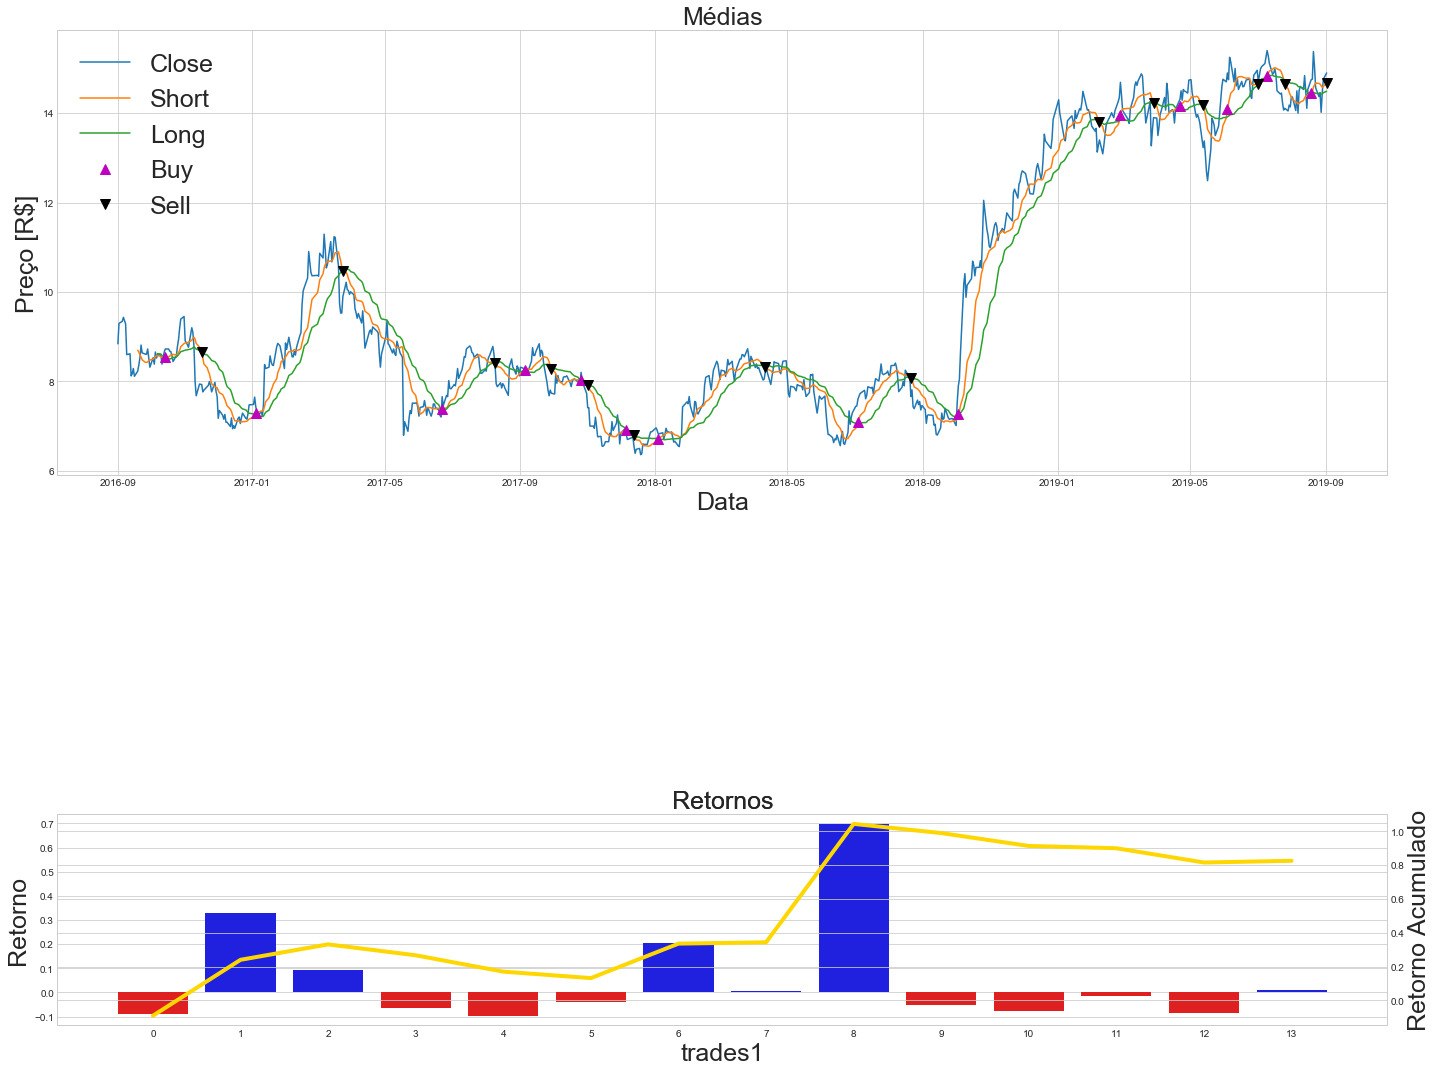

In [4]:
# Sinal de Entrada 1
trades1['signal']=0
signal=np.zeros(len(trades1['signal']))
buy=0
for day in range(1,len(trades1)):
    cond1_buy=trades1['long'].iloc[day-1] > trades1['short'].iloc[day-1]
    cond2_buy=trades1['long'].iloc[day] < trades1['short'].iloc[day]  
    cond1_sell=trades1['long'].iloc[day-1] < trades1['short'].iloc[day-1]
    cond2_sell=trades1['long'].iloc[day] > trades1['short'].iloc[day]   

    if cond1_buy & cond2_buy:
        buy = 1
    if (buy == True) & cond1_sell & cond2_sell:
        buy = 0
    if day == len(trades1)-1:
        buy = 0
    
    signal[day]=buy
trades1['signal']=signal

# Posição dos trades 1
trades1['positions'] = trades1['signal'].diff()

fig = plt.subplots(figsize=(20,15))
plt.style.use('seaborn-whitegrid')

ax1 = plt.subplot(211)
ax1.plot(trades1['Close'], label='Close')
ax1.plot(trades1['short'], label='Short')
ax1.plot(trades1['long'],label='Long')

ax1.plot(trades1.loc[trades1.positions == 1.0].index, 
         trades1.short[trades1.positions == 1.0],
         '^', markersize=10, color='m',label='Buy')
ax1.plot(trades1.loc[trades1.positions == -1.0].index, 
         trades1.short[trades1.positions == -1.0],
         'v', markersize=10, color='k',label='Sell') 

ax1.set_ylabel("Preço [R$]",fontsize=25)
ax1.set_xlabel("Data",fontsize=25)
ax1.set_title("Médias",fontsize=25)
ax1.legend(loc='upper left',fontsize=25)

ax2 = plt.subplot(414)
pos_buy=np.where(trades1['positions']==1)
pos_sell=trades1['positions']==-1
days_buy=trades1['Close'][trades1['positions']==1].index
days_sell=trades1['Close'][trades1['positions']==-1].index
distance=days_sell-days_buy
retornos1=[]
for i in range(len(days_buy)):
    values_2=trades1['Close'][trades1['Close'].index==(days_buy[i]+distance[i])].values[0]
    values_1=trades1['Close'][trades1['Close'].index==days_buy[i]].values[0]
    retornos1.append((values_2-values_1)/values_1)
values = np.array(retornos1)   
#values3=retornos1
plt.ylabel('Retorno',fontsize=25)
plt.xlabel('trades1',fontsize=25)
plt.title('Retornos',fontsize=25)


idx = np.array(list(range(len(retornos1)))) 
clrs = ['red' if (x < 0) else 'blue' for x in values]
sns.barplot(x=idx, y=values, palette=clrs) 
ax22 = ax2.twinx()
ax22.plot(sumper(values),'gold',linewidth=4)

plt.ylabel('Retorno Acumulado',fontsize=25)
plt.xlabel('trades1',fontsize=25)
plt.title('Retornos',fontsize=25)

plt.tight_layout() 

retornos1

In [5]:
# Sinal de Entrada 2
trades2['signal']=0
signal=np.zeros(len(trades2['signal']))
buy=0
for day in range(1,len(trades2)):
    cond1_buy=trades2['long'].iloc[day-1] > trades2['short'].iloc[day-1]
    cond2_buy=trades2['long'].iloc[day] < trades2['short'].iloc[day]  
    cond1_sell=trades2['long'].iloc[day-1] < trades2['short'].iloc[day-1]
    cond2_sell=trades2['long'].iloc[day] > trades2['short'].iloc[day]   

    if cond1_buy & cond2_buy:
        buy = 1
    if (buy == True) & cond1_sell & cond2_sell:
        buy = 0
    if day == len(trades2)-1:
        buy = 0
    
    signal[day]=buy
trades2['signal']=signal

# Posição dos trades 2
trades2['positions'] = trades2['signal'].diff()
pos_buy=np.where(trades2['positions']==1)
pos_sell=trades2['positions']==-1
days_buy=trades2['Close'][trades2['positions']==1].index
days_sell=trades2['Close'][trades2['positions']==-1].index
distance=days_sell-days_buy
retornos2=[]
for i in range(len(days_buy)):
    values_2=trades2['Close'][trades2['Close'].index==(days_buy[i]+distance[i])].values[0]
    values_1=trades2['Close'][trades2['Close'].index==days_buy[i]].values[0]
    retornos2.append((values_2-values_1)/values_1)
values = np.array(retornos2)   

retornos2

[0.032272685657848015,
 -0.06192653767739874,
 -0.2285543132681097,
 -0.14591193399278016,
 0.499999966419918,
 -0.015077795427762369,
 -0.06736032457934137,
 0.07250003814697266,
 -0.045502577796866964,
 0.12739716810991553,
 -0.012894894024096049,
 0.3102666750476053,
 0.14448271126582704,
 0.005732323486333784,
 -0.006913121102246842,
 0.0541022511250182,
 0.18321783849098922]

In [6]:
# Sinal de Entrada 3
trades3['signal']=0
signal=np.zeros(len(trades3['signal']))
buy=0
for day in range(1,len(trades3)):
    cond1_buy=trades3['long'].iloc[day-1] > trades3['short'].iloc[day-1]
    cond2_buy=trades3['long'].iloc[day] < trades3['short'].iloc[day]  
    cond1_sell=trades3['long'].iloc[day-1] < trades3['short'].iloc[day-1]
    cond2_sell=trades3['long'].iloc[day] > trades3['short'].iloc[day]   

    if cond1_buy & cond2_buy:
        buy = 1
    if (buy == True) & cond1_sell & cond2_sell:
        buy = 0
    if day == len(trades3)-1:
        buy = 0
    
    signal[day]=buy
trades3['signal']=signal

# Posição dos trades 3
trades3['positions'] = trades3['signal'].diff()
pos_buy=np.where(trades3['positions']==1)
pos_sell=trades3['positions']==-1
days_buy=trades3['Close'][trades3['positions']==1].index
days_sell=trades3['Close'][trades3['positions']==-1].index
distance=days_sell-days_buy
retornos3=[]
for i in range(len(days_buy)):
    values_2=trades3['Close'][trades3['Close'].index==(days_buy[i]+distance[i])].values[0]
    values_1=trades3['Close'][trades3['Close'].index==days_buy[i]].values[0]
    retornos3.append((values_2-values_1)/values_1)
values = np.array(retornos3)   

retornos3

[0.019011407395610372,
 -0.05068796101882246,
 -0.07777779190628617,
 0.05217393167227687,
 0.027796599824549788,
 -0.04509807355920538,
 -0.014440487901143982,
 0.021657950292558643,
 -0.06520199140179112,
 -0.017595360612286864,
 -0.05381816517223011,
 -0.12307692495793746,
 -0.05018178766424006,
 -0.028077777802952765,
 -0.004357328803345852,
 -0.030913034499837237,
 0.26973687512722627,
 0.04000004359654018,
 -0.010183241436159757]

In [7]:
# Sinal de Entrada 4
trades4['signal']=0
signal=np.zeros(len(trades4['signal']))
buy=0
for day in range(1,len(trades4)):
    cond1_buy=trades4['long'].iloc[day-1] > trades4['short'].iloc[day-1]
    cond2_buy=trades4['long'].iloc[day] < trades4['short'].iloc[day]  
    cond1_sell=trades4['long'].iloc[day-1] < trades4['short'].iloc[day-1]
    cond2_sell=trades4['long'].iloc[day] > trades4['short'].iloc[day]   

    if cond1_buy & cond2_buy:
        buy = 1
    if (buy == True) & cond1_sell & cond2_sell:
        buy = 0
    if day == len(trades4)-1:
        buy = 0
    
    signal[day]=buy
trades4['signal']=signal

# Posição dos trades 4
trades4['positions'] = trades4['signal'].diff()
pos_buy=np.where(trades4['positions']==1)
pos_sell=trades4['positions']==-1
days_buy=trades4['Close'][trades4['positions']==1].index
days_sell=trades4['Close'][trades4['positions']==-1].index
distance=days_sell-days_buy
retornos4=[]
for i in range(len(days_buy)):
    values_2=trades4['Close'][trades4['Close'].index==(days_buy[i]+distance[i])].values[0]
    values_1=trades4['Close'][trades4['Close'].index==days_buy[i]].values[0]
    retornos4.append((values_2-values_1)/values_1)
values = np.array(retornos4)   

retornos4

[0.10112363463504076,
 0.0923076004067054,
 -0.009756088483765963,
 1.095890425872182,
 -0.08556700412646036,
 -0.06256751334835345,
 0.16458331884609387,
 -0.0708447475413653,
 -0.046874985671959864,
 0.12259621336262826,
 0.001021473842778557,
 0.0010384453544128036,
 0.005747148486326996]

In [8]:
# Sinal de Entrada 4
trades5['signal']=0
signal=np.zeros(len(trades5['signal']))
buy=0
for day in range(1,len(trades5)):
    cond1_buy=trades5['long'].iloc[day-1] > trades5['short'].iloc[day-1]
    cond2_buy=trades5['long'].iloc[day] < trades5['short'].iloc[day]  
    cond1_sell=trades5['long'].iloc[day-1] < trades5['short'].iloc[day-1]
    cond2_sell=trades5['long'].iloc[day] > trades5['short'].iloc[day]   

    if cond1_buy & cond2_buy:
        buy = 1
    if (buy == True) & cond1_sell & cond2_sell:
        buy = 0
    if day == len(trades5)-1:
        buy = 0
    
    signal[day]=buy
trades5['signal']=signal

# Posição dos trades 4
trades5['positions'] = trades5['signal'].diff()
pos_buy=np.where(trades5['positions']==1)
pos_sell=trades5['positions']==-1
days_buy=trades5['Close'][trades5['positions']==1].index
days_sell=trades5['Close'][trades5['positions']==-1].index
distance=days_sell-days_buy
retornos5=[]
for i in range(len(days_buy)):
    values_2=trades5['Close'][trades5['Close'].index==(days_buy[i]+distance[i])].values[0]
    values_1=trades5['Close'][trades5['Close'].index==days_buy[i]].values[0]
    retornos5.append((values_2-values_1)/values_1)
values = np.array(retornos5)   

retornos5

[0.22139300266376422,
 -0.025225286218272504,
 -0.068965453455194,
 0.2152466434834002,
 -0.0332103879413339,
 -0.11607144757801205,
 0.394736811442012,
 0.07227328570935353,
 -0.15286621959791025,
 0.03347277106895318,
 -0.10391202319783542,
 -0.037179481379692826,
 -0.18040618550663406,
 -0.006812014944881783,
 -0.010810800361494111,
 -0.022377667428694674,
 -0.01589597287595922]

In [9]:
retornos = [ retornos1 , retornos2 , retornos3 , retornos4 , retornos5 ]

sharpe=[]
for i in range(0, len(retornos)):
    df = pd.DataFrame(retornos[i])
    value=(df.mean()-5/(12*100))/df.std()
    sharpe.append(value)
    
sharpe

[0    0.247526
 dtype: float64, 0    0.266406
 dtype: float64, 0   -0.144688
 dtype: float64, 0    0.31191
 dtype: float64, 0    0.037082
 dtype: float64]

Questão 2: Implemente uma estratégia de trade automático baseado em duas médias móveis anterior, adicionando à aplicação o RSI ou MACD. Verifique o desempenho quanto ao Índice Sharpe nos mesmos ativos e tempo da questão 1.

In [10]:
def ema(data, period=0, column='Close'):
    data['ema' + str(period)] = data[column].ewm(ignore_na=False, min_periods=period, com=period, adjust=True).mean()    
    return data

def macd(data, period_long=26, period_short=12, period_signal=9, column='Close'):
    remove_cols = []
    if not 'ema' + str(period_long) in data.columns:
        data = ema(data, period_long)
        remove_cols.append('ema' + str(period_long))

    if not 'ema' + str(period_short) in data.columns:
        data = ema(data, period_short)
        remove_cols.append('ema' + str(period_short))

    data['macd_val'] = data['ema' + str(period_short)] - data['ema' + str(period_long)]
    data['macd_signal_line'] = data['macd_val'].ewm(ignore_na=False, min_periods=0, com=period_signal, adjust=True).mean()

    data = data.drop(remove_cols, axis=1)
        
    return data

[-0.0761485239943867,
 0.273315053501101,
 0.025317193432608093,
 -0.02671368975048362,
 -0.06177179911519432,
 0.25796658116882554,
 0.04973116703137659,
 0.5449936358253746,
 -0.019480484183077126,
 -0.050169476008011124,
 -0.01761519138550397,
 -0.08842650497773964]

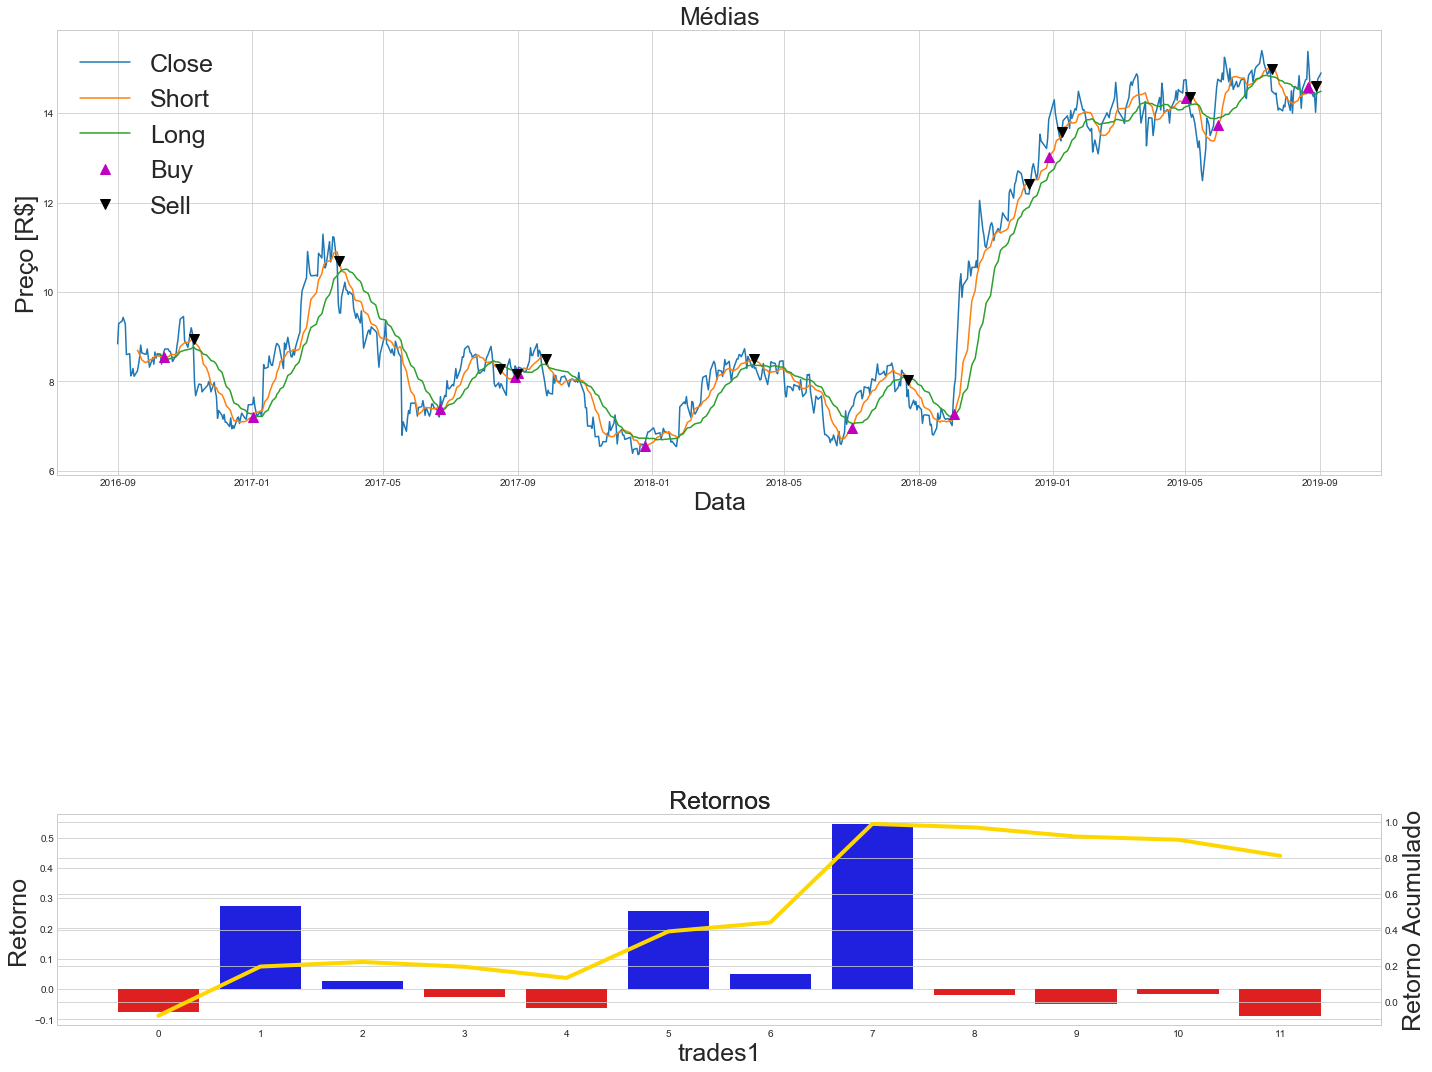

In [11]:
# Sinal de Entrada 1
macd(trades1)
trades1['signal']=0
signal=np.zeros(len(trades1['signal']))
buy=0
for day in range(1,len(trades1)):
    cond1_buy=trades1['macd_signal_line'].iloc[day-1] > trades1['macd_val'].iloc[day-1]
    cond2_buy=trades1['macd_signal_line'].iloc[day] < trades1['macd_val'].iloc[day]  
    cond1_sell=trades1['macd_signal_line'].iloc[day-1] < trades1['macd_val'].iloc[day-1]
    cond2_sell=trades1['macd_signal_line'].iloc[day] > trades1['macd_val'].iloc[day]   

    if cond1_buy & cond2_buy:
        buy = 1
    if (buy == True) & cond1_sell & cond2_sell:
        buy = 0
    if day == len(trades1)-1:
        buy = 0
    
    signal[day]=buy
trades1['signal']=signal

# Posição dos trades 1
trades1['positions'] = trades1['signal'].diff()

fig = plt.subplots(figsize=(20,15))
plt.style.use('seaborn-whitegrid')

ax1 = plt.subplot(211)
ax1.plot(trades1['Close'], label='Close')
ax1.plot(trades1['short'], label='Short')
ax1.plot(trades1['long'],label='Long')

ax1.plot(trades1.loc[trades1.positions == 1.0].index, 
         trades1.short[trades1.positions == 1.0],
         '^', markersize=10, color='m',label='Buy')
ax1.plot(trades1.loc[trades1.positions == -1.0].index, 
         trades1.short[trades1.positions == -1.0],
         'v', markersize=10, color='k',label='Sell') 

ax1.set_ylabel("Preço [R$]",fontsize=25)
ax1.set_xlabel("Data",fontsize=25)
ax1.set_title("Médias",fontsize=25)
ax1.legend(loc='upper left',fontsize=25)

ax2 = plt.subplot(414)
pos_buy=np.where(trades1['positions']==1)
pos_sell=trades1['positions']==-1
days_buy=trades1['Close'][trades1['positions']==1].index
days_sell=trades1['Close'][trades1['positions']==-1].index
distance=days_sell-days_buy
retornosMACD1=[]
for i in range(len(days_buy)):
    values_2=trades1['Close'][trades1['Close'].index==(days_buy[i]+distance[i])].values[0]
    values_1=trades1['Close'][trades1['Close'].index==days_buy[i]].values[0]
    retornosMACD1.append((values_2-values_1)/values_1)
values = np.array(retornosMACD1)   
#values3=retornosMACD1
plt.ylabel('Retorno',fontsize=25)
plt.xlabel('trades1',fontsize=25)
plt.title('Retornos',fontsize=25)


idx = np.array(list(range(len(retornosMACD1)))) 
clrs = ['red' if (x < 0) else 'blue' for x in values]
sns.barplot(x=idx, y=values, palette=clrs) 
ax22 = ax2.twinx()
ax22.plot(sumper(values),'gold',linewidth=4)

plt.ylabel('Retorno Acumulado',fontsize=25)
plt.xlabel('trades1',fontsize=25)
plt.title('Retornos',fontsize=25)

plt.tight_layout() 

retornosMACD1

In [12]:
# Sinal de Entrada 2
macd(trades2)
trades2['signal']=0
signal=np.zeros(len(trades2['signal']))
buy=0
for day in range(1,len(trades2)):
    cond1_buy=trades2['macd_signal_line'].iloc[day-1] > trades2['macd_val'].iloc[day-1]
    cond2_buy=trades2['macd_signal_line'].iloc[day] < trades2['macd_val'].iloc[day]  
    cond1_sell=trades2['macd_signal_line'].iloc[day-1] < trades2['macd_val'].iloc[day-1]
    cond2_sell=trades2['macd_signal_line'].iloc[day] > trades2['macd_val'].iloc[day]   

    if cond1_buy & cond2_buy:
        buy = 1
    if (buy == True) & cond1_sell & cond2_sell:
        buy = 0
    if day == len(trades2)-1:
        buy = 0
    
    signal[day]=buy
trades2['signal']=signal

# Posição dos trades 2
trades2['positions'] = trades2['signal'].diff()
pos_buy=np.where(trades2['positions']==1)
pos_sell=trades2['positions']==-1
days_buy=trades2['Close'][trades2['positions']==1].index
days_sell=trades2['Close'][trades2['positions']==-1].index
distance=days_sell-days_buy
retornosMACD2=[]
for i in range(len(days_buy)):
    values_2=trades2['Close'][trades2['Close'].index==(days_buy[i]+distance[i])].values[0]
    values_1=trades2['Close'][trades2['Close'].index==days_buy[i]].values[0]
    retornosMACD2.append((values_2-values_1)/values_1)
values = np.array(retornosMACD2)   

retornosMACD2

[-0.05006768635686518,
 -0.2879291230916876,
 0.7603304599626254,
 -0.06050277451375814,
 0.1329923520682782,
 -0.07337133271970837,
 -0.11858413522617328,
 -0.07725849697117776,
 -0.042553181023369385,
 0.4894260274847222,
 0.14706844645051673,
 -0.08009953133313513,
 0.3706896981853199]

In [13]:
# Sinal de Entrada 3
macd(trades3)
trades3['signal']=0
signal=np.zeros(len(trades3['signal']))
buy=0
for day in range(1,len(trades3)):
    cond1_buy=trades3['macd_signal_line'].iloc[day-1] > trades3['macd_val'].iloc[day-1]
    cond2_buy=trades3['macd_signal_line'].iloc[day] < trades3['macd_val'].iloc[day]  
    cond1_sell=trades3['macd_signal_line'].iloc[day-1] < trades3['macd_val'].iloc[day-1]
    cond2_sell=trades3['macd_signal_line'].iloc[day] > trades3['macd_val'].iloc[day]   

    if cond1_buy & cond2_buy:
        buy = 1
    if (buy == True) & cond1_sell & cond2_sell:
        buy = 0
    if day == len(trades3)-1:
        buy = 0
    
    signal[day]=buy
trades3['signal']=signal

# Posição dos trades 3
trades3['positions'] = trades3['signal'].diff()
pos_buy=np.where(trades3['positions']==1)
pos_sell=trades3['positions']==-1
days_buy=trades3['Close'][trades3['positions']==1].index
days_sell=trades3['Close'][trades3['positions']==-1].index
distance=days_sell-days_buy
retornosMACD3=[]
for i in range(len(days_buy)):
    values_2=trades3['Close'][trades3['Close'].index==(days_buy[i]+distance[i])].values[0]
    values_1=trades3['Close'][trades3['Close'].index==days_buy[i]].values[0]
    retornosMACD3.append((values_2-values_1)/values_1)
values = np.array(retornosMACD3)   

retornosMACD3

[-0.022962994045681424,
 0.015037579428341809,
 -0.03433473232857806,
 -0.04574691923653155,
 -0.09454546841708096,
 0.048148119891131366,
 0.009960133755035523,
 -0.07112677763719663,
 -0.042537862830278494,
 -0.03776328543769148,
 -0.1512820867078222,
 -0.03914592051732181,
 -0.004341495460730976,
 0.22285304156449695,
 -0.024581652723503194,
 -0.03768844293351759,
 -0.024691358024691357]

In [14]:
# Sinal de Entrada 4
macd(trades4)
trades4['signal']=0
signal=np.zeros(len(trades4['signal']))
buy=0
for day in range(1,len(trades4)):
    cond1_buy=trades4['macd_signal_line'].iloc[day-1] > trades4['macd_val'].iloc[day-1]
    cond2_buy=trades4['macd_signal_line'].iloc[day] < trades4['macd_val'].iloc[day]  
    cond1_sell=trades4['macd_signal_line'].iloc[day-1] < trades4['macd_val'].iloc[day-1]
    cond2_sell=trades4['macd_signal_line'].iloc[day] > trades4['macd_val'].iloc[day]   

    if cond1_buy & cond2_buy:
        buy = 1
    if (buy == True) & cond1_sell & cond2_sell:
        buy = 0
    if day == len(trades4)-1:
        buy = 0
    
    signal[day]=buy
trades4['signal']=signal

# Posição dos trades 4
trades4['positions'] = trades4['signal'].diff()
pos_buy=np.where(trades4['positions']==1)
pos_sell=trades4['positions']==-1
days_buy=trades4['Close'][trades4['positions']==1].index
days_sell=trades4['Close'][trades4['positions']==-1].index
distance=days_sell-days_buy
retornosMACD4=[]
for i in range(len(days_buy)):
    values_2=trades4['Close'][trades4['Close'].index==(days_buy[i]+distance[i])].values[0]
    values_1=trades4['Close'][trades4['Close'].index==days_buy[i]].values[0]
    retornosMACD4.append((values_2-values_1)/values_1)
values = np.array(retornosMACD4)   

retornosMACD4

[0.07880433603050825,
 0.08351640036797155,
 0.8612441457684408,
 -0.03386240225216502,
 0.1431451678803262,
 -0.0673854440510645,
 0.0,
 0.07900944722424529,
 -0.0296735160482829,
 -0.03193619100591887,
 0.059322004544846825]

In [15]:
# Sinal de Entrada 5
macd(trades5)
trades5['signal']=0
signal=np.zeros(len(trades5['signal']))
buy=0
for day in range(1,len(trades5)):
    cond1_buy=trades5['macd_signal_line'].iloc[day-1] > trades5['macd_val'].iloc[day-1]
    cond2_buy=trades5['macd_signal_line'].iloc[day] < trades5['macd_val'].iloc[day]  
    cond1_sell=trades5['macd_signal_line'].iloc[day-1] < trades5['macd_val'].iloc[day-1]
    cond2_sell=trades5['macd_signal_line'].iloc[day] > trades5['macd_val'].iloc[day]   

    if cond1_buy & cond2_buy:
        buy = 1
    if (buy == True) & cond1_sell & cond2_sell:
        buy = 0
    if day == len(trades5)-1:
        buy = 0
    
    signal[day]=buy
trades5['signal']=signal

# Posição dos trades 5
trades5['positions'] = trades5['signal'].diff()
pos_buy=np.where(trades5['positions']==1)
pos_sell=trades5['positions']==-1
days_buy=trades5['Close'][trades5['positions']==1].index
days_sell=trades5['Close'][trades5['positions']==-1].index
distance=days_sell-days_buy
retornosMACD5=[]
for i in range(len(days_buy)):
    values_2=trades5['Close'][trades5['Close'].index==(days_buy[i]+distance[i])].values[0]
    values_1=trades5['Close'][trades5['Close'].index==days_buy[i]].values[0]
    retornosMACD5.append((values_2-values_1)/values_1)
values = np.array(retornosMACD5)   

retornosMACD5

[0.012544833802593516,
 0.024013699539913478,
 0.16233766635888994,
 0.008849506735177053,
 0.24436084059217794,
 0.08522725964257533,
 -0.051851917697674894,
 0.12121214623309301,
 -0.02499997615814209,
 -0.01254703980740804,
 -0.1032413134923279,
 -0.03663500476513667,
 -0.08053690201258569,
 -0.051655673307313396,
 -0.03183788640372306]

In [16]:
retornosMACD = [ retornosMACD1 , retornosMACD2 , retornosMACD3 , retornosMACD4 , retornosMACD5 ]

sharpeMACD=[]
for i in range(0, len(retornosMACD)):
    df = pd.DataFrame(retornosMACD[i])
    value=(df.mean()-5/(12*100))/df.std()
    sharpeMACD.append(value)
    
sharpeMACD

[0    0.329313
 dtype: float64, 0    0.278302
 dtype: float64, 0   -0.311562
 dtype: float64, 0    0.38386
 dtype: float64, 0    0.140379
 dtype: float64]

In [17]:
DifSharpe12=[]
for i in range(0, len(retornosMACD)):
    value=0
    value=sharpeMACD[i]-sharpe[i]
    DifSharpe12.append(value)

#SharpeMACD-sharpe
DifSharpe12

[0    0.081787
 dtype: float64, 0    0.011895
 dtype: float64, 0   -0.166874
 dtype: float64, 0    0.07195
 dtype: float64, 0    0.103297
 dtype: float64]

Questão 3: Escolha uma estratégia de trade automático de contra tendência, apresentada na Referência Palex . Verifique o desempenho quanto ao Índice Sharpe nos mesmos ativos e tempo da questão 1.